In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    average_precision_score
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('dataset_PD.csv')
val_df = pd.read_csv('dataset_validation.csv')

In [12]:
val_df.head()

,loan_id,Age,Education,MaritalStatus,HasDependents,EmploymentType,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanPurpose,LoanAmount,LoanTerm,InterestRate,HasCoSigner
0,200000,57,High School,Married,Yes,Full-time,113,29463,595,1,No,0.59,Education,64405,60,4.61,Yes
1,200001,26,High School,Divorced,No,Unemployed,55,133262,533,2,No,0.87,Other,168774,24,21.34,No
2,200002,26,Master's,Divorced,Yes,Full-time,97,102551,564,4,Yes,0.50,Business,11229,24,4.84,No
3,200003,28,PhD,Divorced,No,Unemployed,117,64632,496,1,Yes,0.36,Other,227862,36,19.83,No
4,200004,18,Bachelor's,Single,Yes,Unemployed,31,120202,540,4,Yes,0.10,Other,65165,60,19.31,No


In [3]:
df.head()

,loan_id,Age,Education,MaritalStatus,HasDependents,EmploymentType,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanPurpose,LoanAmount,LoanTerm,InterestRate,HasCoSigner,Default
0,0,25,PhD,Married,Yes,Self-employed,84,119007,790,3,No,0.73,Business,93703,60,12.48,No,0
1,1,40,Master's,Divorced,Yes,Self-employed,50,63276,420,1,Yes,0.14,Auto,240094,24,4.54,Yes,0
2,2,38,PhD,Single,Yes,Self-employed,45,45264,563,4,Yes,0.54,Education,179845,36,22.49,Yes,0
3,3,51,PhD,Divorced,Yes,Unemployed,60,88939,617,4,Yes,0.51,Auto,212685,24,11.82,Yes,0
4,4,47,PhD,Single,No,Self-employed,50,120066,401,3,Yes,0.34,Education,24352,60,10.16,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_id         200000 non-null  int64  
 1   Age             200000 non-null  int64  
 2   Education       200000 non-null  object 
 3   MaritalStatus   200000 non-null  object 
 4   HasDependents   200000 non-null  object 
 5   EmploymentType  200000 non-null  object 
 6   MonthsEmployed  200000 non-null  int64  
 7   Income          200000 non-null  int64  
 8   CreditScore     200000 non-null  int64  
 9   NumCreditLines  200000 non-null  int64  
 10  HasMortgage     200000 non-null  object 
 11  DTIRatio        200000 non-null  float64
 12  LoanPurpose     200000 non-null  object 
 13  LoanAmount      200000 non-null  int64  
 14  LoanTerm        200000 non-null  int64  
 15  InterestRate    200000 non-null  float64
 16  HasCoSigner     200000 non-null  object 
 17  Default   

In [5]:
print(df['Education'].unique())
print(df['MaritalStatus'].unique())
print(df['HasDependents'].unique())
print(df['EmploymentType'].unique())
print(df['HasMortgage'].unique())
print(df['LoanPurpose'].unique())
print(df['HasCoSigner'].unique())

['PhD' "Master's" 'High School' "Bachelor's"]
['Married' 'Divorced' 'Single']
['Yes' 'No']
['Self-employed' 'Unemployed' 'Full-time' 'Part-time']
['No' 'Yes']
['Business' 'Auto' 'Education' 'Other' 'Home']
['No' 'Yes']


In [6]:
df_encoded = pd.get_dummies(
    df,
    columns=['MaritalStatus','LoanPurpose', 'Education', 'EmploymentType'],
    drop_first=True,
    dummy_na=False,
    prefix_sep="__"
)
bool_cols = df_encoded.select_dtypes(include=["bool"]).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype("int8")
df_encoded

,loan_id,Age,HasDependents,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanAmount,...,LoanPurpose__Business,LoanPurpose__Education,LoanPurpose__Home,LoanPurpose__Other,Education__High School,Education__Master's,Education__PhD,EmploymentType__Part-time,EmploymentType__Self-employed,EmploymentType__Unemployed
0,0,25,Yes,84,119007,790,3,No,0.73,93703,...,1,0,0,0,0,0,1,0,1,0
1,1,40,Yes,50,63276,420,1,Yes,0.14,240094,...,0,0,0,0,0,1,0,0,1,0
2,2,38,Yes,45,45264,563,4,Yes,0.54,179845,...,0,1,0,0,0,0,1,0,1,0
3,3,51,Yes,60,88939,617,4,Yes,0.51,212685,...,0,0,0,0,0,0,1,0,0,1
4,4,47,No,50,120066,401,3,Yes,0.34,24352,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,23,Yes,19,139919,305,3,No,0.53,52032,...,1,0,0,0,0,1,0,0,0,1
199996,199996,64,Yes,16,75895,370,3,Yes,0.55,35686,...,0,0,0,1,0,0,0,0,0,1
199997,199997,35,Yes,80,102430,800,4,No,0.64,44276,...,0,0,1,0,1,0,0,0,1,0
199998,199998,18,No,86,80510,517,4,Yes,0.23,149623,...,0,0,0,1,1,0,0,0,1,0


In [16]:
val_df_encoded = pd.get_dummies(
    val_df,
    columns=['MaritalStatus','LoanPurpose', 'Education', 'EmploymentType'],
    drop_first=True,
    dummy_na=False,
    prefix_sep="__"
)
bool_cols = val_df_encoded.select_dtypes(include=["bool"]).columns
val_df_encoded[bool_cols] = val_df_encoded[bool_cols].astype("int8")
val_df_encoded

,loan_id,Age,HasDependents,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanAmount,...,LoanPurpose__Business,LoanPurpose__Education,LoanPurpose__Home,LoanPurpose__Other,Education__High School,Education__Master's,Education__PhD,EmploymentType__Part-time,EmploymentType__Self-employed,EmploymentType__Unemployed
0,200000,57,Yes,113,29463,595,1,No,0.59,64405,...,0,1,0,0,1,0,0,0,0,0
1,200001,26,No,55,133262,533,2,No,0.87,168774,...,0,0,0,1,1,0,0,0,0,1
2,200002,26,Yes,97,102551,564,4,Yes,0.50,11229,...,1,0,0,0,0,1,0,0,0,0
3,200003,28,No,117,64632,496,1,Yes,0.36,227862,...,0,0,0,1,0,0,1,0,0,1
4,200004,18,Yes,31,120202,540,4,Yes,0.10,65165,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,53,Yes,39,140213,530,2,Yes,0.23,224149,...,0,0,0,1,0,1,0,0,0,1
49996,249996,34,Yes,12,100343,641,3,Yes,0.38,240952,...,0,0,0,0,1,0,0,0,0,0
49997,249997,22,Yes,39,112882,558,3,Yes,0.50,168094,...,1,0,0,0,0,1,0,1,0,0
49998,249998,21,No,4,120770,836,1,No,0.69,83915,...,1,0,0,0,0,0,1,0,0,1


In [20]:
val_df_encoded.columns

Index(['loan_id', 'Age', 'HasDependents', 'MonthsEmployed', 'Income',
       'CreditScore', 'NumCreditLines', 'HasMortgage', 'DTIRatio',
       'LoanAmount', 'LoanTerm', 'InterestRate', 'HasCoSigner',
       'MaritalStatus__Married', 'MaritalStatus__Single',
       'LoanPurpose__Business', 'LoanPurpose__Education', 'LoanPurpose__Home',
       'LoanPurpose__Other', 'Education__High School', 'Education__Master's',
       'Education__PhD', 'EmploymentType__Part-time',
       'EmploymentType__Self-employed', 'EmploymentType__Unemployed'],
      dtype='object')

In [21]:
df_encoded.columns

Index(['loan_id', 'Age', 'HasDependents', 'MonthsEmployed', 'Income',
       'CreditScore', 'NumCreditLines', 'HasMortgage', 'DTIRatio',
       'LoanAmount', 'LoanTerm', 'InterestRate', 'HasCoSigner', 'Default',
       'MaritalStatus__Married', 'MaritalStatus__Single',
       'LoanPurpose__Business', 'LoanPurpose__Education', 'LoanPurpose__Home',
       'LoanPurpose__Other', 'Education__High School', 'Education__Master's',
       'Education__PhD', 'EmploymentType__Part-time',
       'EmploymentType__Self-employed', 'EmploymentType__Unemployed'],
      dtype='object')

In [8]:
df_encoded['HasDependents'] = (df_encoded['HasDependents'].map({'Yes':1,'No':0}).astype(int))
df_encoded['HasMortgage'] = (df_encoded['HasMortgage'].map({'Yes':1,'No':0}).astype(int))
df_encoded['HasCoSigner'] = (df_encoded['HasCoSigner'].map({'Yes':1,'No':0}).astype(int))
df_encoded.head()

,loan_id,Age,HasDependents,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanAmount,...,LoanPurpose__Business,LoanPurpose__Education,LoanPurpose__Home,LoanPurpose__Other,Education__High School,Education__Master's,Education__PhD,EmploymentType__Part-time,EmploymentType__Self-employed,EmploymentType__Unemployed
0,0,25,1,84,119007,790,3,0,0.73,93703,...,1,0,0,0,0,0,1,0,1,0
1,1,40,1,50,63276,420,1,1,0.14,240094,...,0,0,0,0,0,1,0,0,1,0
2,2,38,1,45,45264,563,4,1,0.54,179845,...,0,1,0,0,0,0,1,0,1,0
3,3,51,1,60,88939,617,4,1,0.51,212685,...,0,0,0,0,0,0,1,0,0,1
4,4,47,0,50,120066,401,3,1,0.34,24352,...,0,1,0,0,0,0,1,0,1,0


In [22]:
val_df_encoded['HasDependents'] = (val_df_encoded['HasDependents'].map({'Yes':1,'No':0}).astype(int))
val_df_encoded['HasMortgage'] = (val_df_encoded['HasMortgage'].map({'Yes':1,'No':0}).astype(int))
val_df_encoded['HasCoSigner'] = (val_df_encoded['HasCoSigner'].map({'Yes':1,'No':0}).astype(int))
val_df_encoded

,loan_id,Age,HasDependents,MonthsEmployed,Income,CreditScore,NumCreditLines,HasMortgage,DTIRatio,LoanAmount,...,LoanPurpose__Business,LoanPurpose__Education,LoanPurpose__Home,LoanPurpose__Other,Education__High School,Education__Master's,Education__PhD,EmploymentType__Part-time,EmploymentType__Self-employed,EmploymentType__Unemployed
0,200000,57,1,113,29463,595,1,0,0.59,64405,...,0,1,0,0,1,0,0,0,0,0
1,200001,26,0,55,133262,533,2,0,0.87,168774,...,0,0,0,1,1,0,0,0,0,1
2,200002,26,1,97,102551,564,4,1,0.50,11229,...,1,0,0,0,0,1,0,0,0,0
3,200003,28,0,117,64632,496,1,1,0.36,227862,...,0,0,0,1,0,0,1,0,0,1
4,200004,18,1,31,120202,540,4,1,0.10,65165,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,53,1,39,140213,530,2,1,0.23,224149,...,0,0,0,1,0,1,0,0,0,1
49996,249996,34,1,12,100343,641,3,1,0.38,240952,...,0,0,0,0,1,0,0,0,0,0
49997,249997,22,1,39,112882,558,3,1,0.50,168094,...,1,0,0,0,0,1,0,1,0,0
49998,249998,21,0,4,120770,836,1,0,0.69,83915,...,1,0,0,0,0,0,1,0,0,1


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_id                        200000 non-null  int64  
 1   Age                            200000 non-null  int64  
 2   HasDependents                  200000 non-null  int64  
 3   MonthsEmployed                 200000 non-null  int64  
 4   Income                         200000 non-null  int64  
 5   CreditScore                    200000 non-null  int64  
 6   NumCreditLines                 200000 non-null  int64  
 7   HasMortgage                    200000 non-null  int64  
 8   DTIRatio                       200000 non-null  float64
 9   LoanAmount                     200000 non-null  int64  
 10  LoanTerm                       200000 non-null  int64  
 11  InterestRate                   200000 non-null  float64
 12  HasCoSigner                   

In [11]:
df['Default'].mean()

np.float64(0.11598)

In [34]:
y = df_encoded['Default'].astype(int)
X = df_encoded.drop(columns=['Default','loan_id'])

X_val = val_df_encoded.copy()

In [35]:
num_cols = [
    "Age", "MonthsEmployed", "Income", "CreditScore", "NumCreditLines",
    "DTIRatio", "LoanAmount", "LoanTerm", "InterestRate"
]
scaler = StandardScaler()
X_train_scaled = X.copy()
X_valid_scaled = X_val.copy()

num_cols = X_train_scaled.select_dtypes(include="number").columns

X_train_scaled[num_cols] = scaler.fit_transform(X_train_scaled[num_cols])
X_valid_scaled[num_cols] = scaler.transform(X_valid_scaled[num_cols])

In [68]:
logit = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    max_iter=3000,
    class_weight='balanced'
)

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'l1_ratios'

In [56]:
LogisticRegression?

In [66]:
X = X_train_scaled

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

oof_pred = np.zeros(len(y))

for train_idx, val_idx in cv.split(X, y):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    logit.fit(X_tr, y_tr)
    oof_pred[val_idx] = logit.predict_proba(X_val)[:, 1]

In [67]:
roc_auc = roc_auc_score(y, oof_pred)
gini = 2 * roc_auc - 1

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Gini: {gini:.4f}")

ROC-AUC: 0.7491
Gini: 0.4982


In [44]:
def ks_stat(y_true, y_prob, n_bins=10):
    df = pd.DataFrame({"y": y_true, "p": y_prob})
    df["bucket"] = pd.qcut(df["p"], q=n_bins, duplicates="drop")

    grouped = df.groupby("bucket")["y"]
    bad = grouped.sum()
    good = grouped.count() - bad

    cum_bad = bad.cumsum() / bad.sum()
    cum_good = good.cumsum() / good.sum()

    ks = np.max(np.abs(cum_bad - cum_good))
    return ks

ks = ks_stat(y, oof_pred)
print(f"KS statistic: {ks:.4f}")

KS statistic: 0.3654


/tmp/ipython-input-1449051836.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("bucket")["y"]


In [45]:
pr_auc = average_precision_score(y, oof_pred)
print(f"PR-AUC: {pr_auc:.4f}")

PR-AUC: 0.3054


In [46]:
def woe_iv(df, feature, target, bins=10):
    d = df[[feature, target]].copy()
    d["bin"] = pd.qcut(d[feature], q=bins, duplicates="drop")

    grouped = d.groupby("bin")[target]
    bad = grouped.sum()
    good = grouped.count() - bad

    dist_bad = bad / bad.sum()
    dist_good = good / good.sum()

    woe = np.log(dist_good / dist_bad)
    iv = ((dist_good - dist_bad) * woe).sum()

    return iv

In [49]:
iv_credit_score = woe_iv(df, "CreditScore", "Default")
print(f"IV(CreditScore): {iv_credit_score:.4f}")

IV(CreditScore): 0.0125


/tmp/ipython-input-2329009831.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = d.groupby("bin")[target]


In [69]:
def gini_from_auc(auc):
    return 2 * auc - 1

def ks_stat(y_true, y_prob, n_bins=10):
    df = pd.DataFrame({"y": y_true, "p": y_prob})
    df["bucket"] = pd.qcut(df["p"], q=n_bins, duplicates="drop")

    bad = df.groupby("bucket")["y"].sum()
    total = df.groupby("bucket")["y"].count()
    good = total - bad

    cum_bad = bad.cumsum() / bad.sum()
    cum_good = good.cumsum() / good.sum()

    return float(np.max(np.abs(cum_bad - cum_good)))


X_np = X.values if hasattr(X, "values") else X
y_np = y.values if hasattr(y, "values") else y

Cs = np.logspace(-4, 2, 10)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_params = None
best_auc = -np.inf

results = []

for C in Cs:
    for l1 in l1_ratios:
        oof = np.zeros(len(y_np))

        for tr_idx, va_idx in cv.split(X_np, y_np):
            X_tr, X_va = X_np[tr_idx], X_np[va_idx]
            y_tr, y_va = y_np[tr_idx], y_np[va_idx]

            model = LogisticRegression(
                penalty="elasticnet",
                solver="saga",
                l1_ratio=l1,
                C=C,
                max_iter=5000,
                n_jobs=-1
            )
            model.fit(X_tr, y_tr)
            oof[va_idx] = model.predict_proba(X_va)[:, 1]

        auc = roc_auc_score(y_np, oof)
        results.append((C, l1, auc))

        if auc > best_auc:
            best_auc = auc
            best_params = {"C": C, "l1_ratio": l1}
            best_oof = oof.copy()

print("Best CV AUC:", best_auc)
print("Best params:", best_params)
print("Best CV Gini:", gini_from_auc(best_auc))
print("Best CV KS:", ks_stat(y_np, best_oof, n_bins=10))

res_df = pd.DataFrame(results, columns=["C", "l1_ratio", "AUC"]).sort_values("AUC", ascending=False)
print("\nTop 10 configs:")
print(res_df.head(10).to_string(index=False))

# ------------------------
# Fit final model on ALL training data using best params
# ------------------------
final_model = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    l1_ratio=best_params["l1_ratio"],
    C=best_params["C"],
    max_iter=5000,
    n_jobs=-1
)
final_model.fit(X_np, y_np)


Best CV AUC: 0.7490254015815498
Best params: {'C': np.float64(0.046415888336127774), 'l1_ratio': 0.9}
Best CV Gini: 0.4980508031630997
Best CV KS: 0.3649029202568294

Top 10 configs:
       C  l1_ratio      AUC
0.046416       0.9 0.749025
0.046416       0.7 0.749025
0.010000       0.1 0.749025
0.046416       0.5 0.749025
0.046416       0.3 0.749024
0.010000       0.3 0.749023
0.215443       0.9 0.749023
0.046416       0.1 0.749023
0.215443       0.7 0.749023
0.215443       0.3 0.749022


/tmp/ipython-input-1692786982.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad = df.groupby("bucket")["y"].sum()
/tmp/ipython-input-1692786982.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df.groupby("bucket")["y"].count()


LogisticRegression(C=np.float64(0.046415888336127774), l1_ratio=0.9,
                   max_iter=5000, n_jobs=-1, penalty='elasticnet',
                   solver='saga')

In [72]:
coef = pd.Series(final_model.coef_[0], index=X.columns)
coef_nonzero = coef[coef != 0].sort_values(key=np.abs, ascending=False)

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nonzero.head(15)

Number of non-zero coefficients: 24


,0
Age,-0.595550
InterestRate,0.459027
Income,-0.343814
MonthsEmployed,-0.340692
LoanAmount,0.302702
EmploymentType__Unemployed,0.191855
HasCoSigner,-0.135156
CreditScore,-0.122940
HasDependents,-0.119957
EmploymentType__Part-time,0.118647


In [73]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_prob = np.zeros(len(y))

for tr_idx, va_idx in cv.split(X, y):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr = y.iloc[tr_idx]

    final_model.fit(X_tr, y_tr)
    oof_prob[va_idx] = final_model.predict_proba(X_va)[:, 1]

In [74]:
def ks_at_threshold(y_true, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)

    tp = ((y_pred == 1) & (y_true == 1)).sum()
    fp = ((y_pred == 1) & (y_true == 0)).sum()
    fn = ((y_pred == 0) & (y_true == 1)).sum()
    tn = ((y_pred == 0) & (y_true == 0)).sum()

    tpr = tp / (tp + fn) if (tp + fn) else 0.0
    fpr = fp / (fp + tn) if (fp + tn) else 0.0

    return abs(tpr - fpr)
thresholds = np.linspace(0.01, 0.50, 200)

rows = []

for t in thresholds:
    ks = ks_at_threshold(y, oof_prob, t)

    rows.append({
        "threshold": t,
        "KS": ks
    })

thr_df = pd.DataFrame(rows)
best_ks_row = thr_df.loc[thr_df["KS"].idxmax()]

best_threshold_ks = best_ks_row["threshold"]
best_ks = best_ks_row["KS"]

print(f"Best threshold (KS): {best_threshold_ks:.3f}")
print(f"KS at threshold:     {best_ks:.4f}")

Best threshold (KS): 0.121
KS at threshold:     0.3676


In [75]:
from sklearn.metrics import f1_score

rows = []

for t in thresholds:
    y_pred = (oof_prob >= t).astype(int)
    f1 = f1_score(y, y_pred)

    rows.append({
        "threshold": t,
        "F1": f1
    })

f1_df = pd.DataFrame(rows)
best_f1_row = f1_df.loc[f1_df["F1"].idxmax()]

In [103]:
from sklearn.metrics import f1_score, recall_score, precision_score
rows = []

for t in thresholds:
    y_pred = (oof_prob >= t).astype(int)

    rows.append({
        "threshold": t,
        "recall": recall_score(y, y_pred),
        "precision": precision_score(y, y_pred, zero_division=0),
        "f1": f1_score(y, y_pred)
    })

metrics_df = pd.DataFrame(rows)

In [106]:
best_f1_row = metrics_df.loc[metrics_df["f1"].idxmax()]

print("Best threshold by F1:")
print(
    f"threshold = {best_f1_row['threshold']:.3f}, "
    f"F1 = {best_f1_row['f1']:.3f}, "
    f"Recall = {best_f1_row['recall']:.3f}, "
    f"Precision = {best_f1_row['precision']:.3f}"
)


Best threshold by F1:
threshold = 0.173, F1 = 0.358, Recall = 0.509, Precision = 0.276


In [95]:
# TARGET = "Default"

# X = train_df.drop(columns=[TARGET])
# y = train_df[TARGET].astype(int).values
loan_amount = df["LoanAmount"].values

assert len(X) == len(y) == len(loan_amount)

BEST_C = 0.046415888336127774
BEST_L1 = 0.9

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_prob = np.zeros(len(y))

for tr_idx, va_idx in cv.split(X, y):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr = y[tr_idx]

    model = LogisticRegression(
        penalty="elasticnet",
        solver="saga",
        C=BEST_C,
        l1_ratio=BEST_L1,
        max_iter=5000,
        n_jobs=-1
    )
    model.fit(X_tr, y_tr)
    oof_prob[va_idx] = model.predict_proba(X_va)[:, 1]

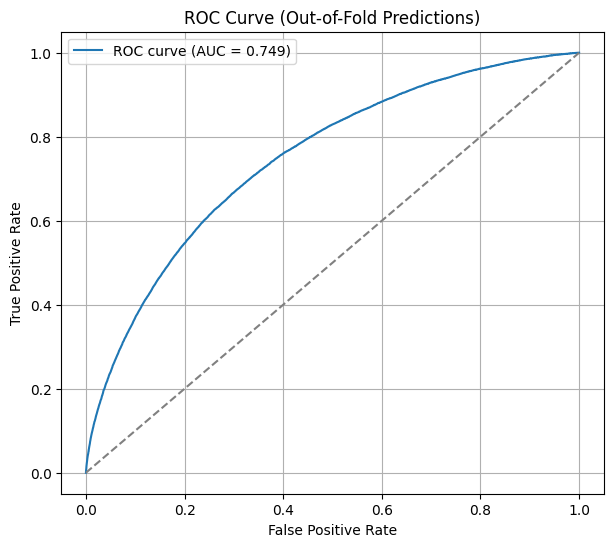

In [96]:
fpr, tpr, roc_thresholds = roc_curve(y, oof_prob)
auc = roc_auc_score(y, oof_prob)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Out-of-Fold Predictions)")
plt.legend()
plt.grid(True)
plt.show()

In [97]:
LGD = 0.45
FP_COST_RATE = 0.05

def expected_cost(y_true, y_prob, loan_amount, threshold):
    y_pred = (y_prob >= threshold).astype(int)

    fn_mask = (y_true == 1) & (y_pred == 0)
    fp_mask = (y_true == 0) & (y_pred == 1)

    fn_cost = (loan_amount[fn_mask] * LGD).sum()
    fp_cost = (loan_amount[fp_mask] * FP_COST_RATE).sum()

    return fn_cost + fp_cost, fn_mask, fp_mask

In [98]:
inspect_thresholds = [0.05, 0.10, 0.15, 0.20]

for t in inspect_thresholds:
    y_pred = (oof_prob >= t).astype(int)
    cm = confusion_matrix(y, y_pred)

    cost, fn_mask, fp_mask = expected_cost(
        y, oof_prob, loan_amount, t
    )

    print(f"\n=== Threshold = {t:.2f} ===")
    print("Confusion Matrix [ [TN FP], [FN TP] ]:")
    print(cm)
    print(f"False Negatives: {fn_mask.sum()}")
    print(f"False Positives: {fp_mask.sum()}")
    print(f"Expected Cost: {cost:,.0f}")


=== Threshold = 0.05 ===
Confusion Matrix [ [TN FP], [FN TP] ]:
[[ 56687 120117]
 [  1850  21346]]
False Negatives: 1850
False Positives: 120117
Expected Cost: 904,051,484

=== Threshold = 0.10 ===
Confusion Matrix [ [TN FP], [FN TP] ]:
[[108432  68372]
 [  5824  17372]]
False Negatives: 5824
False Positives: 68372
Expected Cost: 799,376,516

=== Threshold = 0.15 ===
Confusion Matrix [ [TN FP], [FN TP] ]:
[[137337  39467]
 [  9765  13431]]
False Negatives: 9765
False Positives: 39467
Expected Cost: 842,107,625

=== Threshold = 0.20 ===
Confusion Matrix [ [TN FP], [FN TP] ]:
[[153713  23091]
 [ 13218   9978]]
False Negatives: 13218
False Positives: 23091
Expected Cost: 950,982,696


In [99]:
threshold = 0.15
_, fn_mask, fp_mask = expected_cost(y, oof_prob, loan_amount, threshold)

false_negatives = X.loc[fn_mask]
false_positives = X.loc[fp_mask]

print("False Negatives sample:")
display(false_negatives[["LoanAmount", "CreditScore", "DTIRatio"]].head())

print("False Positives sample:")
display(false_positives[["LoanAmount", "CreditScore", "DTIRatio"]].head())

False Negatives sample:


,LoanAmount,CreditScore,DTIRatio
12,-0.924787,-0.726988,0.388961
23,-1.477330,0.658437,-0.476984
35,-0.033971,1.439312,0.432258
43,-0.650309,-1.211887,1.687878
82,0.585332,-0.399524,-0.909956


False Positives sample:


,LoanAmount,CreditScore,DTIRatio
2,0.738248,-0.072060,0.172475
6,0.141152,0.475812,0.345664
21,1.197138,-0.204305,-1.169740
26,-0.635062,-0.758475,0.735339
27,0.123378,0.960711,-1.472820


In [100]:
thresholds = np.linspace(0.01, 0.25, 60)

rows = []
for t in thresholds:
    cost, _, _ = expected_cost(
        y, oof_prob, loan_amount, t
    )
    rows.append({"threshold": t, "expected_cost": cost})

cost_df = pd.DataFrame(rows)

best_row = cost_df.loc[cost_df["expected_cost"].idxmin()]
best_threshold = best_row["threshold"]
best_cost = best_row["expected_cost"]

print(f"\nOptimal threshold: {best_threshold:.3f}")
print(f"Minimum expected cost: {best_cost:,.0f}")


Optimal threshold: 0.099
Minimum expected cost: 799,671,614


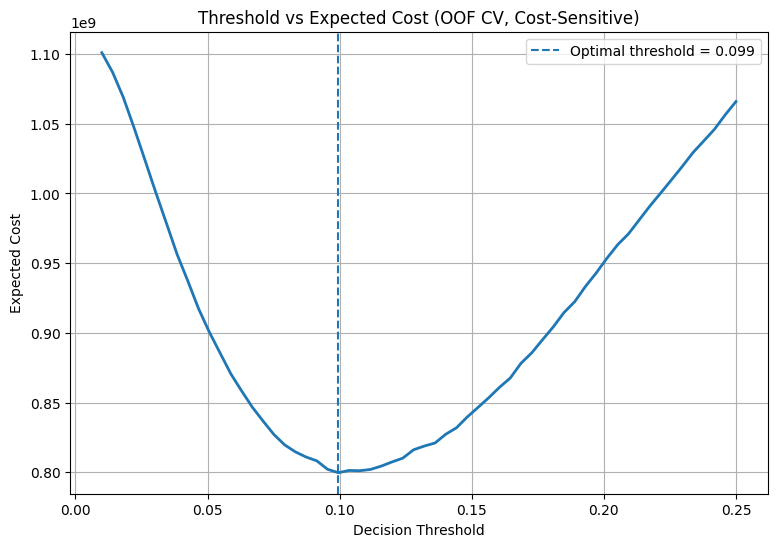

In [101]:
plt.figure(figsize=(9, 6))
plt.plot(cost_df["threshold"], cost_df["expected_cost"], linewidth=2)
plt.axvline(
    best_threshold,
    linestyle="--",
    label=f"Optimal threshold = {best_threshold:.3f}"
)

plt.xlabel("Decision Threshold")
plt.ylabel("Expected Cost")
plt.title("Threshold vs Expected Cost (OOF CV, Cost-Sensitive)")
plt.legend()
plt.grid(True)
plt.show()